# 1. Import Ntuple and DecayHash

In [1]:
import root_pandas
#import uproot
import decayHash
import basf2 as b2
from decayHash import DecayHashMap
import numpy as np
import ROOT
import pandas
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
plt.style.use('belle2')

from collections import OrderedDict

def found(modes,row):
    for mode in modes:
        if mode.startswith(str(int(row['B0_mcPDG']))):
            decaytree = ROOT.Belle2.DecayTree(mode)
            if hashmap2.get_original_decay(row["B0_DecayHash"],row["B0_DecayHashEx"]).find_decay(decaytree):
                return True
        else:
            continue
    return False

def decay_mode(row):
    for name,modes in mode_dict.items():
        if found(modes,row):
            return name
    return 'bkg' # other_B_decay (hadronic) or hadronic_tau or other_D_decay or charged_B or continuum

# the order of keys might be important, try to keep the muon modes at the bottom for e reconstruction
# the e modes will be kept at the bottom for a muon reconstruction
mode_dict = OrderedDict()
mode_dict['sig_D_tau_nu']=['511 (-> -411 (-> 321 -211 -211) -15 (-> -11 12 -16) 16)',
                           '-511 (-> 411 (-> -321 211 211) 15 (-> 11 -12 16) -16)',
                           '511 (-> -411 (-> 321 -211 -211) -15 (-> -13 14 -16) 16)',
                           '-511 (-> 411 (-> -321 211 211) 15 (-> 13 -14 16) -16)']

mode_dict['sig_D_e_nu']=['511 (-> -411 (-> 321 -211 -211) -11 12)',
                         '-511 (-> 411 (-> -321 211 211) 11 -12)']

mode_dict['sig_Dst_tau_nu']=['511 (-> -413 (-> -411 (-> 321 -211 -211) 111) -15 (-> -11 12 -16) 16)',
                             '-511 (-> 413 (-> 411 (-> -321 211 211) 111) 15 (-> 11 -12 16) -16)',
                             '511 (-> -413 (-> -411 (-> 321 -211 -211) 111) -15 (-> -13 14 -16) 16)',
                             '-511 (-> 413 (-> 411 (-> -321 211 211) 111) 15 (-> 13 -14 16) -16)',
                             '511 (-> -413 (-> -411 (-> 321 -211 -211) 22) -15 (-> -11 12 -16) 16)',
                             '-511 (-> 413 (-> 411 (-> -321 211 211) 22) 15 (-> 11 -12 16) -16)',
                             '511 (-> -413 (-> -411 (-> 321 -211 -211) 22) -15 (-> -13 14 -16) 16)',
                             '-511 (-> 413 (-> 411 (-> -321 211 211) 22) 15 (-> 13 -14 16) -16)']

mode_dict['sig_Dst_e_nu']=['511 (-> -413 (-> -411 (-> 321 -211 -211) 111) -11 12)',
                           '511 (-> -413 (-> -411 (-> 321 -211 -211) 22) -11 12)',
                           '-511 (-> 413 (-> 411 (-> -321 211 211) 111) 11 -12)',
                           '-511 (-> 413 (-> 411 (-> -321 211 211) 22) 11 -12)']

mode_dict['all_Dstst_tau_nu']=['511 (-> -10413 -15 (-> -11 12 -16) 16)','-511 (-> 10413 15 (-> 11 -12 16) -16)',
                               '511 (-> -10411 -15 (-> -11 12 -16) 16)','-511 (-> 10411 15 (-> 11 -12 16) -16)',
                               '511 (-> -20413 -15 (-> -11 12 -16) 16)','-511 (-> 20413 15 (-> 11 -12 16) -16)',
                               '511 (-> -415 -15 (-> -11 12 -16) 16)',  '-511 (-> 415 15 (-> 11 -12 16) -16)',
                               '521 (-> -10423 -15 (-> -11 12 -16) 16)','-521 (-> 10423 15 (-> 11 -12 16) -16)',
                               '521 (-> -10421 -15 (-> -11 12 -16) 16)','-521 (-> 10421 15 (-> 11 -12 16) -16)',
                               '521 (-> -20423 -15 (-> -11 12 -16) 16)','-521 (-> 20423 15 (-> 11 -12 16) -16)',
                               '521 (-> -425 -15 (-> -11 12 -16) 16)',  '-521 (-> 425 15 (-> 11 -12 16) -16)',
                               '511 (-> -10413 -15 (-> -13 14 -16) 16)','-511 (-> 10413 15 (-> 13 -14 16) -16)',
                               '511 (-> -10411 -15 (-> -13 14 -16) 16)','-511 (-> 10411 15 (-> 13 -14 16) -16)',
                               '511 (-> -20413 -15 (-> -13 14 -16) 16)','-511 (-> 20413 15 (-> 13 -14 16) -16)',
                               '511 (-> -415 -15 (-> -13 14 -16) 16)',  '-511 (-> 415 15 (-> 13 -14 16) -16)',
                               '521 (-> -10423 -15 (-> -13 14 -16) 16)','-521 (-> 10423 15 (-> 13 -14 16) -16)',
                               '521 (-> -10421 -15 (-> -13 14 -16) 16)','-521 (-> 10421 15 (-> 13 -14 16) -16)',
                               '521 (-> -20423 -15 (-> -13 14 -16) 16)','-521 (-> 20423 15 (-> 13 -14 16) -16)',
                               '521 (-> -425 -15 (-> -13 14 -16) 16)',  '-521 (-> 425 15 (-> 13 -14 16) -16)']

mode_dict['all_Dstst_e_nu']=['511 (-> -10413 -11 12)','-511 (-> 10413 11 -12)',
                             '511 (-> -10411 -11 12)','-511 (-> 10411 11 -12)',
                             '511 (-> -20413 -11 12)','-511 (-> 20413 11 -12)',
                             '511 (-> -415 -11 12)',  '-511 (-> 415 11 -12)',
                             '511 (-> -411 221 -11 12)','-511 (-> 411 221 11 -12)',
                             '511 (-> -411 111 -11 12)','-511 (-> 411 111 11 -12)',
                             '511 (-> -411 111 111 -11 12)','-511 (-> 411 111 111 11 -12)',
                             '511 (-> -411 211 -211 -11 12)','-511 (-> 411 211 -211 11 -12)',
                             '511 (-> -413 221 -11 12)','-511 (-> 413 221 11 -12)',
                             '511 (-> -413 111 -11 12)','-511 (-> 413 111 11 -12)',
                             '511 (-> -413 111 111 -11 12)','-511 (-> 413 111 111 11 -12)',
                             '511 (-> -413 211 -211 -11 12)','-511 (-> 413 211 -211 11 -12)',
                             '511 (-> -421 -211 -11 12)','-511 (-> 421 211 11 -12)',
                             '511 (-> -423 -211 -11 12)','-511 (-> 423 211 11 -12)',
                             '521 (-> -10423 -11 12)','-521 (-> 10423 11 -12)',
                             '521 (-> -10421 -11 12)','-521 (-> 10421 11 -12)',
                             '521 (-> -20423 -11 12)','-521 (-> 20423 11 -12)',
                             '521 (-> -425 -11 12)',  '-521 (-> 425 11 -12)',
                             '521 (-> -411 211 -11 12)','-521 (-> 411 211 11 -12)',
                             '521 (-> -411 211 111 -11 12)','-521 (-> 411 211 111 11 -12)',
                             '521 (-> -413 211 -11 12)','-521 (-> 413 211 11 -12)',
                             '521 (-> -413 211 111 -11 12)','-521 (-> 413 211 111 11 -12)']

mode_dict['sig_D_mu_nu']=['511 (-> -411 (-> 321 -211 -211) -13 14)',
                          '-511 (-> 411 (-> -321 211 211) 13 -14)']

mode_dict['sig_Dst_mu_nu']=['511 (-> -413 (-> -411 (-> 321 -211 -211) 111) -13 14)',
                           '511 (-> -413 (-> -411 (-> 321 -211 -211) 22) -13 14)',
                           '-511 (-> 413 (-> 411 (-> -321 211 211) 111) 13 -14)',
                           '-511 (-> 413 (-> 411 (-> -321 211 211) 22) 13 -14)']

mode_dict['all_Dstst_mu_nu']=['511 (-> -10413 -13 14)','-511 (-> 10413 13 -14)',
                              '511 (-> -10411 -13 14)','-511 (-> 10411 13 -14)',
                              '511 (-> -20413 -13 14)','-511 (-> 20413 13 -14)',
                              '511 (-> -415 -13 14)',  '-511 (-> 415 13 -14)',
                              '511 (-> -411 221 -13 14)','-511 (-> 411 221 13 -14)',
                              '511 (-> -411 111 -13 14)','-511 (-> 411 111 13 -14)',
                              '511 (-> -411 111 111 -13 14)','-511 (-> 411 111 111 13 -14)',
                              '511 (-> -411 211 -211 -13 14)','-511 (-> 411 211 -211 13 -14)',
                              '511 (-> -413 221 -13 14)','-511 (-> 413 221 13 -14)',
                              '511 (-> -413 111 -13 14)','-511 (-> 413 111 13 -14)',
                              '511 (-> -413 111 111 -13 14)','-511 (-> 413 111 111 13 -14)',
                              '511 (-> -413 211 -211 -13 14)','-511 (-> 413 211 -211 13 -14)',
                              '511 (-> -421 -211 -13 14)','-511 (-> 421 211 13 -14)',
                              '511 (-> -423 -211 -13 14)','-511 (-> 423 211 13 -14)',
                              '521 (-> -10423 -13 14)','-521 (-> 10423 13 -14)',
                              '521 (-> -10421 -13 14)','-521 (-> 10421 13 -14)',
                              '521 (-> -20423 -13 14)','-521 (-> 20423 13 -14)',
                              '521 (-> -425 -13 14)',  '-521 (-> 425 13 -14)',
                              '521 (-> -411 211 -13 14)','-521 (-> 411 211 13 -14)',
                              '521 (-> -411 211 111 -13 14)','-521 (-> 411 211 111 13 -14',
                              '521 (-> -413 211 -13 14)','-521 (-> 413 211 13 -14)',
                              '521 (-> -413 211 111 -13 14)','-521 (-> 413 211 111 13 -14)']

cut = 'D_vtxReChi2<13 and B0_vtxReChi2<14 and -3.2<B0_deltaE<0 and e_CMS_p>0.2 and \
    5<B0_roeMbc_my_mask and 4.3<B0_CMS2_weMbc and B0_CMS_E<5.4 and \
    -5<B0_roeDeltae_my_mask<2 and -3<B0_CMS0_weDeltae<2 and \
    abs(B0_roeCharge_my_mask)<3 and nElectrons90+nMuons90==1 and \
    0.2967<B0_Lab5_weMissPTheta<2.7925 and 0.2967<B0_Lab6_weMissPTheta<2.7925 and \
    0<B0_TagVReChi2<100 and 0<B0_TagVReChi2IP<100'

Welcome to JupyROOT 6.24/00


In [ ]:
# read in root-file as a pandas dataframe

Dstst_e_nu_selection = 'DecayMode=="all_Dstst_e_nu" and B0_mcPDG*D_mcPDG==-511*411 and D_mcPDG*e_mcPDG==411*11 and e_genMotherPDG==B0_mcPDG and \
    ((B0_mcErrors<64 and abs(B0_mcPDG)==511) or (B0_mcErrors<512 and abs(B0_mcPDG)==521))'
Dstst_tau_nu_selection = 'DecayMode=="all_Dstst_tau_nu" and B0_mcPDG*D_mcPDG==-511*411 and D_mcPDG*e_mcPDG==411*11 and e_mcPDG*e_genMotherPDG==11*15 and \
    ((B0_mcErrors<64 and abs(B0_mcPDG)==511) or (B0_mcErrors<512 and abs(B0_mcPDG)==521))'
signals_selection = 'B0_mcPDG*D_mcPDG==-511*411 and D_mcPDG*e_mcPDG==411*11 and e_mcPDG*e_genMotherPDG==11*15'
norms_selection = 'B0_mcPDG*D_mcPDG==-511*411 and D_mcPDG*e_mcPDG==411*11 and e_genMotherPDG==B0_mcPDG'


samples = {}
files = ['D_tau', 'Dst_tau','Dstst_tau', 'D_l','Dst_l', 'Dstst_l']
for file_name in files:
    if file_name in ['D_tau', 'D_l']:
        filesize = '50k'
    else:
        filesize = '10k'
    filename=f'/home/belle/zhangboy/R_D/Signal_MC_ROEx1/B2{file_name}_nu/Ntuples/bengal_e_{filesize}.root'
    decayhash=f'/home/belle/zhangboy/R_D/Signal_MC_ROEx1/B2{file_name}_nu/Ntuples/hashmap_bengal_e_{filesize}.root'
    #data = uproot.open(filename)['B0'].arrays(library="pd")
    data = root_pandas.read_root(filename,key='B0')
    hashmap = DecayHashMap(decayhash, removeRadiativeGammaFlag=False)
    hashmap2 = DecayHashMap(decayhash, removeRadiativeGammaFlag=True)
    
    data['B0_mcPDG'] = data['B0_mcPDG'].fillna(0)
    data['DecayMode'] = data.apply(decay_mode, axis=1) #axis=0 will allow the application to be done at a column
    #df_cut=data.query(cut_string).copy()
    df_cut=data
    
    df_cut['isSignal'] = 1.0
    df_cut.eval('B_D_ReChi2 = B0_vtxReChi2 + D_vtxReChi2', inplace=True)
    df_cut.eval('p_D_l = D_CMS_p + e_CMS_p', inplace=True)
    
    df_bestSelected=df_cut.loc[df_cut.groupby(['__experiment__','__run__','__event__','__production__']).B_D_ReChi2.idxmin()]
    # Signal components
    if file_name == 'D_tau':
        sig_D_tau_nu=df_bestSelected.query(f'DecayMode=="sig_D_tau_nu" and B0_mcErrors<32 and {signals_selection}').copy()
        samples['$D\\tau\\nu$'] = sig_D_tau_nu
        
    if file_name == 'Dst_tau':
        sig_Dst_tau_nu=df_bestSelected.query(f'DecayMode=="sig_Dst_tau_nu" and B0_mcErrors<64 and {signals_selection}').copy()
        samples['$D^\\ast\\tau\\nu$'] = sig_Dst_tau_nu
        
    if file_name == 'D_l':
        sig_D_e_nu=df_bestSelected.query(f'DecayMode=="sig_D_e_nu" and B0_mcErrors<16 and {norms_selection}').copy()
        samples['$D\ell\\nu$'] = sig_D_e_nu
        
    if file_name == 'Dst_l':
        sig_Dst_e_nu=df_bestSelected.query(f'DecayMode=="sig_Dst_e_nu" and B0_mcErrors<64 and {norms_selection}').copy()
        samples['$D^\\ast\ell\\nu$'] = sig_Dst_e_nu
        
    if file_name == 'Dstst_tau':
        all_Dstst_tau_nu=df_bestSelected.query(Dstst_tau_nu_selection).copy()
        samples['$D^{\\ast\\ast}\\tau\\nu$'] = all_Dstst_tau_nu
        
    if file_name == 'Dstst_l':
        all_Dstst_e_nu=df_bestSelected.query(Dstst_e_nu_selection).copy()
        samples['$D^{\\ast\\ast}\ell\\nu$'] = all_Dstst_e_nu


    #sig_D_mu_nu=df_bestSelected.query('DecayMode=="sig_D_mu_nu" and B0_mcErrors<16').copy()
    #sig_Dst_mu_nu=df_bestSelected.query('DecayMode=="sig_Dst_mu_nu" and (16<=B0_mcErrors<32 or B0_mcErrors<8)').copy()
    #all_Dstst_mu_nu=df_bestSelected.query('DecayMode=="all_Dstst_mu_nu" and (16<=B0_mcErrors<64 or B0_mcErrors<8)').copy()

    # Bkg components
#     bkg_fakeD = df_bestSelected.query('abs(D_mcPDG)!=411 and B0_mcErrors!=512 and B0_isContinuumEvent!=1').copy()
#     bkg_fakeTracksClusters = df_bestSelected.query('B0_mcErrors==512 and B0_isContinuumEvent!=1').copy()
#     bkg_fakeDTC = pandas.concat([bkg_fakeD, bkg_fakeTracksClusters])

#     bkg_combinatorial = df_bestSelected.query('B0_mcPDG==300553 and abs(D_mcPDG)==411 and B0_mcErrors!=512 and B0_isContinuumEvent!=1').copy()
#     bkg_sigOtherBDTaudecay = df_bestSelected.query('(DecayMode=="bkg" or DecayMode=="sig_D_mu_nu" or DecayMode=="sig_Dst_mu_nu" or DecayMode=="all_Dstst_mu_nu") and \
#     B0_mcPDG!=300553 and abs(D_mcPDG)==411 and B0_mcErrors!=512 and B0_isContinuumEvent!=1').copy()
#     bkg_fakeB = pandas.concat([bkg_combinatorial, bkg_sigOtherBDTaudecay])

#     bkg_continuum = df_bestSelected.query('B0_isContinuumEvent==1').copy()

#     bkg_others = pandas.concat([df_bestSelected,
#                                sig_D_e_nu,
#                                sig_D_tau_nu,
#                                sig_Dst_e_nu,
#                                sig_Dst_tau_nu,
#                                all_Dstst_e_nu,
#                                all_Dstst_tau_nu,
#                                bkg_fakeDTC,
#                                bkg_fakeB,
#                                bkg_continuum]).drop_duplicates(keep=False)
    # Weird! the bkg_others contains some events with
    # correct sig decay hash chain and correct B0_mcPDG, D_mcPDG, e_genMotherPDG,
    # but with 128< B0_mcErrors < 256 (misID)
    
#     components = {'sig_D_l_nu':sig_D_e_nu,
#                  'sig_D_tau_nu':sig_D_tau_nu,
#                  'sig_Dst_l_nu':sig_Dst_e_nu,
#                  'sig_Dst_tau_nu':sig_Dst_tau_nu,
#                  'all_Dstst_l_nu':all_Dstst_e_nu,
#                  'all_Dstst_tau_nu':all_Dstst_tau_nu,
#                  'bkg_fakeDTC':bkg_fakeDTC,
#                  'bkg_fakeB':bkg_fakeB,
#                  'bkg_continuum':bkg_continuum,
#                  'bkg_others':bkg_others}
    
#     samples[decaymode] = components

In [7]:
def statistics(df):
    counts=df.count()
    mean=df.mean()
    std=df.std()
    return f'''counts = %d \nmean = %5.3f \nstd = %5.3f''' %(counts,mean,std)

kwarg={'histtype':'step','lw':2}
    

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)

def plot_all_signals(cut, variable):
    fig,axs =plt.subplots(2,3,figsize=(16,10), sharex=True, sharey=False)
    fig.suptitle(f'All signals with {cut}')
    fig.supylabel('# of candidates per bin',x=0.06)
    fig.supxlabel(f'{variable}', y=0.06)
    i=0
    j=0
    for sample_name, sample in samples.items():
        (counts, bins) = np.histogram(sample.query(cut)[variable], bins=50)
        if sample_name in ['sig_D_l_nu','sig_D_tau_nu','bkg_fakeDTC','bkg_fakeB','bkg_continuum','bkg_others']:
            factor = 1
        elif sample_name in ['sig_Dst_l_nu','sig_Dst_tau_nu','all_Dstst_l_nu','all_Dstst_tau_nu']:
            factor = 1
        axs[i,j].hist(bins[:-1], bins, weights=factor*counts,label=sample_name,**kwarg)

        #plt.legend(bbox_to_anchor=(1,1),ncol=3, fancybox=True, shadow=True,labelspacing=1.5)
        axs[i,j].grid()
        axs[i,j].set_title(sample_name)
        j+=1
        if j==3:
            i+=1
            j=0
            
def plot_all_signals_2d(cut):
    variable_x = 'B0_CMS3_weMissM2'
    variable_y = 'p_D_l'
    xedges = np.linspace(-2, 10, 48)
    yedges = np.linspace(0.4, 4.6, 42)

    n_rows,n_cols = [2,3]
    fig,axs=plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16,8),sharex=True, sharey='all')
    fig.suptitle('Signals')
    fig.supylabel('$|p_D|\ +\ |p_l|\ [GeV]$', x=0.05)
    fig.supxlabel('$M_{miss}^2\ [GeV^2/c^4]$')
    i=0
    j=0
    for name, sample in samples.items():
        (counts, xedges, yedges) = np.histogram2d(sample.query(cut)[variable_x], 
                                              sample.query(cut)[variable_y],
                                              bins=[xedges, yedges])
        counts = counts.T + 0.01
        X, Y = np.meshgrid(xedges, yedges)
        im=axs[i,j].pcolormesh(X, Y, counts, cmap='jet', norm=colors.LogNorm())
        axs[i,j].grid()
        axs[i,j].set_xlim(xedges.min(),xedges.max())
        axs[i,j].set_ylim(yedges.min(),yedges.max())
        axs[i,j].set_title(name,fontsize=12)
        fig.colorbar(im,ax=axs[i,j])
        j+=1
        if j==3:
            i+=1
            j=0
            
def plot_overlaid_signals(cut, variable):
    fig,axs =plt.subplots(1,2,figsize=(12,5), sharex=True, sharey=False)
    fig.suptitle(f'Overlaid signals with pre-selection', y=1)
    fig.supylabel('# of candidates per bin',x=0.06)
    #fig.supxlabel('$|\\vec{p_D}|\ +\ |\\vec{p_l}|$  [GeV/c]')
    #fig.supxlabel('$M_{miss}^2 \ [GeV^2/c^4]$')
    fig.supxlabel(f'{variable}')

    for sample_name, sample in samples.items():
        (counts, bins) = np.histogram(sample.query(cut)[variable], bins=50)
        factor=1
        if sample_name in ['sig_D_tau_nu','sig_Dst_tau_nu','all_Dstst_tau_nu']:
            axs[0].hist(bins[:-1], bins, weights=factor*counts,label=sample_name,**kwarg)
            axs[0].legend()
        elif sample_name in ['sig_D_l_nu','sig_Dst_l_nu','all_Dstst_l_nu']:
            axs[1].hist(bins[:-1], bins, weights=factor*counts,label=sample_name,**kwarg)
            axs[1].legend()
        #plt.legend(bbox_to_anchor=(1,1),ncol=3, fancybox=True, shadow=True,labelspacing=1.5)

    axs[0].set_title('signals')
    axs[1].set_title('normalization')
    axs[0].grid()
    axs[1].grid()
    
def plot_overlaid_signals_2(cut, variable):
    fig,axs =plt.subplots(figsize=(12,5), sharex=True, sharey=False)
    fig.suptitle(f'Overlaid signals with pre-selection', y=1)
    fig.supylabel('# of candidates per bin',x=0.06)
    #fig.supxlabel('$|\\vec{p_D}|\ +\ |\\vec{p_l}|$  [GeV/c]')
    #fig.supxlabel('$M_{miss}^2 \ [GeV^2/c^4]$')
    fig.supxlabel(f'{variable}')

    for sample_name, sample in samples.items():
        if sample_name in ['sig_D_tau_nu']:
            (counts, bins) = np.histogram(sample.query(cut)[variable], bins=50)
            factor=1
        elif sample_name in ['all_Dstst_l_nu']:
            (counts, bins) = np.histogram(sample.query(cut)[variable], bins=50)
            factor=1
        else:
            continue
        axs.hist(bins[:-1], bins, weights=factor*counts,label=sample_name,**kwarg)
        axs.legend()
        #plt.legend(bbox_to_anchor=(1,1),ncol=3, fancybox=True, shadow=True,labelspacing=1.5)
    axs.grid()
    
def plot_projection(cut,variable):
    fig,axs =plt.subplots(sharex=True, sharey=False)
    for sample_name, sample in samples.items():
        (counts, bins) = np.histogram(sample.query(cut)[variable], bins=50)
        factor=1
        if sample_name in ['sig_D_tau_nu','sig_Dst_tau_nu','all_Dstst_tau_nu']:
            axs.hist(bins[:-1], bins, weights=factor*counts,label=f'{sample_name} \n{statistics(sample.query(cut)[variable])}',**kwarg)
        elif sample_name in ['sig_D_l_nu','sig_Dst_l_nu','all_Dstst_l_nu']:
            axs.hist(bins[:-1], bins, weights=factor*counts,label=f'{sample_name} \n{statistics(sample.query(cut)[variable])}',**kwarg)

    axs.set_title('Overlaid signals with pre-selection')
    axs.set_xlabel(f'{variable}')
    axs.set_ylabel('# of candidates per bin')
    axs.grid()
    plt.legend(bbox_to_anchor=(1,1),ncol=3, fancybox=True, shadow=True,labelspacing=1.5)
    
    
def plot_fitting_difference(yaml_file):
    fig,axs =plt.subplots(2,3,figsize=(16,10), sharex=True, sharey=False)
    fig.suptitle(f'fitted yield - true yield')
    fig.supylabel('yield difference',x=0.06)
    fig.supxlabel(f'index of subset samples', y=0.06)
    i=0
    j=0
    with open(yaml_file, 'r+') as f:
        data = yaml.safe_load(f)
        components = data['signal_e']

    for comp_name, info in components.items():
        axs[i,j].errorbar(x=range(1,len(info['difference'])+1), y=info['difference'], yerr=info['errors'], fmt='ko')
        axs[i,j].axhline(y=0, linestyle='-', linewidth=3, color='r')
        axs[i,j].grid()
        axs[i,j].set_title(comp_name)
        j+=1
        if j==3 and i==0:
            i+=1
            j=0
        if j==3 and i==1:
            break

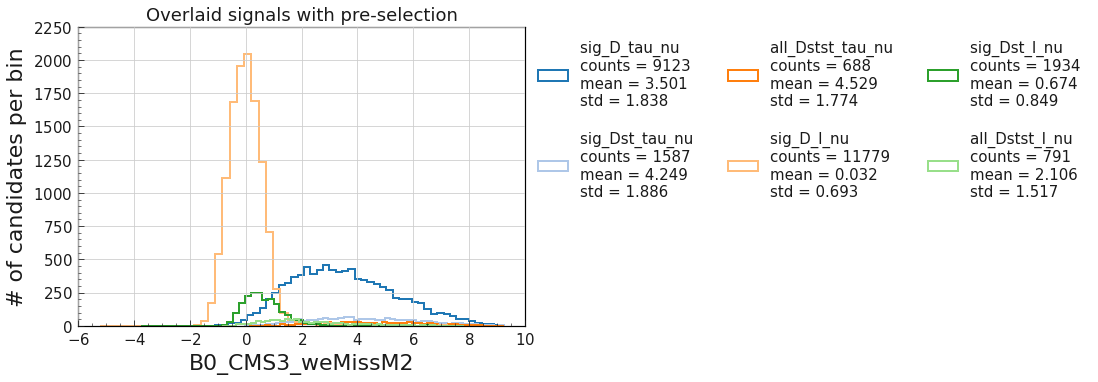

In [20]:
plot_projection('B0_roeMbc_my_mask>5', 'B0_CMS3_weMissM2')

In [21]:
sample_list = []
for name in samples:
    sample_list.append(samples[name])
df_merged = pandas.concat(sample_list).sample(frac=1) # .sample randomizes the df
df_merged['DecayMode'] = df_merged['DecayMode'].astype('category')
df_merged.to_parquet('sample_merged.parquet', engine="pyarrow", index=False)

# 5. Fitting

In [1]:
import glob
import numpy as np
import pandas
import root_pandas
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
plt.style.use('belle2')
from tqdm import tqdm
import pyhf
pyhf.set_backend('numpy','minuit')
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)

import json
import yaml

workspace_file = '/home/belle/zhangboy/R_D/Signal_MC14ri/2d_2channels_workspace_3_singleComponent.json'
results = 'results_3.yaml'
with open(workspace_file, 'r+') as work_f:
    spec = json.load(work_f)
#    spec['observations'][0]['name'] = 'electron mode'
#    spec['observations'][0]['data'] = counts.ravel().tolist()
    spec_1 = {'channels': spec['channels']}
    model_1 = pyhf.Model(spec_1, poi_name=None)
    NumOfComp = len(spec['channels'][0]['samples'])
#model_1.spec
#workspace = pyhf.Workspace(spec)
#workspace

Welcome to JupyROOT 6.24/00


In [2]:
df_merged = pandas.read_parquet('sample_merged.parquet',engine="pyarrow")
subsets = np.array_split(df_merged, 1)

In [3]:
Dstst_e_nu_selection = 'DecayMode=="all_Dstst_e_nu" and D_mcPDG*e_mcPDG==411*11 and e_genMotherPDG==B0_mcPDG and \
    ((B0_mcErrors<64 and B0_mcPDG*D_mcPDG==-511*411) or (B0_mcErrors<512 and abs(B0_mcPDG)==521))'
Dstst_tau_nu_selection = 'DecayMode=="all_Dstst_tau_nu" and D_mcPDG*e_mcPDG==411*11 and e_mcPDG*e_genMotherPDG==11*15 and \
    ((B0_mcErrors<64 and B0_mcPDG*D_mcPDG==-511*411) or (B0_mcErrors<512 and abs(B0_mcPDG)==521))'
signals_selection = 'B0_mcPDG*D_mcPDG==-511*411 and D_mcPDG*e_mcPDG==411*11 and e_mcPDG*e_genMotherPDG==11*15'
norms_selection = 'B0_mcPDG*D_mcPDG==-511*411 and D_mcPDG*e_mcPDG==411*11 and e_genMotherPDG==B0_mcPDG'

chunkNum = 0
for df_bestSelected in tqdm(subsets, desc ="Looping over chunks"):
    samples = {}

    # Signal components
    sig_D_tau_nu=df_bestSelected.query(f'DecayMode=="sig_D_tau_nu" and B0_mcErrors<32 and {signals_selection}').copy()
    sig_Dst_tau_nu=df_bestSelected.query(f'DecayMode=="sig_Dst_tau_nu" and B0_mcErrors<64 and {signals_selection}').copy()
    sig_D_e_nu=df_bestSelected.query(f'DecayMode=="sig_D_e_nu" and B0_mcErrors<16 and {norms_selection}').copy()
    sig_Dst_e_nu=df_bestSelected.query(f'DecayMode=="sig_Dst_e_nu" and B0_mcErrors<64 and {norms_selection}').copy() 
    all_Dstst_tau_nu=df_bestSelected.query(Dstst_tau_nu_selection).copy() 
    all_Dstst_e_nu=df_bestSelected.query(Dstst_e_nu_selection).copy()

    samples['$D\\tau\\nu$'] = sig_D_tau_nu
    #samples['$D^\\ast\\tau\\nu$'] = sig_Dst_tau_nu
    #samples['$D\ell\\nu$'] = sig_D_e_nu
    #samples['$D^\\ast\ell\\nu$'] = sig_Dst_e_nu
    #samples['$D^{\\ast\\ast}\\tau\\nu$'] = all_Dstst_tau_nu
    #samples['$D^{\\ast\\ast}\ell\\nu$'] = all_Dstst_e_nu
    
    print(f'file: {chunkNum}')
    for name in samples:
          print(f'{name}: {len(samples[name])}')

        #sig_D_mu_nu=df_bestSelected.query('DecayMode=="sig_D_mu_nu" and B0_mcErrors<16').copy()
        #sig_Dst_mu_nu=df_bestSelected.query('DecayMode=="sig_Dst_mu_nu" and (16<=B0_mcErrors<32 or B0_mcErrors<8)').copy()
        #all_Dstst_mu_nu=df_bestSelected.query('DecayMode=="all_Dstst_mu_nu" and (16<=B0_mcErrors<64 or B0_mcErrors<8)').copy()

        # Bkg components
    #     bkg_fakeD = df_bestSelected.query('abs(D_mcPDG)!=411 and B0_mcErrors!=512 and B0_isContinuumEvent!=1').copy()
    #     bkg_fakeTracksClusters = df_bestSelected.query('B0_mcErrors==512 and B0_isContinuumEvent!=1').copy()
    #     bkg_fakeDTC = pandas.concat([bkg_fakeD, bkg_fakeTracksClusters])

    #     bkg_combinatorial = df_bestSelected.query('B0_mcPDG==300553 and abs(D_mcPDG)==411 and B0_mcErrors!=512 and B0_isContinuumEvent!=1').copy()
    #     bkg_sigOtherBDTaudecay = df_bestSelected.query('(DecayMode=="bkg" or DecayMode=="sig_D_mu_nu" or DecayMode=="sig_Dst_mu_nu" or DecayMode=="all_Dstst_mu_nu") and \
    #     B0_mcPDG!=300553 and abs(D_mcPDG)==411 and B0_mcErrors!=512 and B0_isContinuumEvent!=1').copy()
    #     bkg_fakeB = pandas.concat([bkg_combinatorial, bkg_sigOtherBDTaudecay])

    #     bkg_continuum = df_bestSelected.query('B0_isContinuumEvent==1').copy()

    #     bkg_others = pandas.concat([df_bestSelected,
    #                                sig_D_e_nu,
    #                                sig_D_tau_nu,
    #                                sig_Dst_e_nu,
    #                                sig_Dst_tau_nu,
    #                                all_Dstst_e_nu,
    #                                all_Dstst_tau_nu,
    #                                bkg_fakeDTC,
    #                                bkg_fakeB,
    #                                bkg_continuum]).drop_duplicates(keep=False)
        # Weird! the bkg_others contains some events with
        # correct sig decay hash chain and correct B0_mcPDG, D_mcPDG, e_genMotherPDG,
        # but with 128< B0_mcErrors < 256 (misID)

    #     components = {'sig_D_l_nu':sig_D_e_nu,
    #                  'sig_D_tau_nu':sig_D_tau_nu,
    #                  'sig_Dst_l_nu':sig_Dst_e_nu,
    #                  'sig_Dst_tau_nu':sig_Dst_tau_nu,
    #                  'all_Dstst_l_nu':all_Dstst_e_nu,
    #                  'all_Dstst_tau_nu':all_Dstst_tau_nu,
    #                  'bkg_fakeDTC':bkg_fakeDTC,
    #                  'bkg_fakeB':bkg_fakeB,
    #                  'bkg_continuum':bkg_continuum,
    #                  'bkg_others':bkg_others}

    #     samples[decaymode] = components



    sample_list = []
    for name in samples:
        sample_list.append(samples[name])
    df_merged = pandas.concat(sample_list)
    
    cut='B0_roeMbc_my_mask>4.26'
    xedges = np.linspace(-2, 10, 48) # -7.5 for weMiss2, -2 for weMiss3, -2.5 for weMiss4
    yedges = np.linspace(0.4, 4.6, 42)
    variable_x = 'B0_CMS3_weMissM2'
    variable_y = 'p_D_l'

    (counts, xedges, yedges) = np.histogram2d(df_merged.query(cut)[variable_x], 
                                              df_merged.query(cut)[variable_y],
                                              bins=[xedges, yedges])
    counts = counts.T
    

    def fit():
        global parameters, correlations
        parameters, correlations= pyhf.infer.mle.fit(np.concatenate([counts.flat]), model_1, return_uncertainties=True, return_correlations=True)
        sum_event=0
        for i in range(len(parameters)):
            norm = parameters[i,0]
            template_counts = np.sum(model_1.spec['channels'][0]['samples'][i]['data'])
            component_name = model_1.spec['channels'][0]['samples'][i]['name']
            fitted_counts = round(parameters[i,0] * template_counts)
            fitted_error = round(parameters[i,1] * template_counts)
            print(f'\n{component_name} counts:             {fitted_counts}')
            print(f'{component_name} counts uncertainty: {fitted_error}')
            sum_event+= fitted_counts
            with open(results, 'r+') as f:
                data = yaml.safe_load(f)
                data['signal_e'][component_name]['difference'][chunkNum]=fitted_counts - len(samples[component_name])
                data['signal_e'][component_name]['errors'][chunkNum]=fitted_error
                f.seek(0)        # <--- should reset file position to the beginning.
                yaml.dump(data, f, indent=4)
                f.truncate()     # remove remaining part

        print(f'\nTotal fitted counts: {sum_event}')
        print(f'Total fitted counts uncertainty: ')
        print(f'Total generated counts: {len(df_merged)}')
        print(f'\nFitting parameters: \n{parameters}')
        print(f'Fitting parameter correlations: \n{correlations}')
    #    print(f'uncertainty: {parameters[0][1]}')
        with open(results, 'r+') as f:
            data = yaml.safe_load(f)
            data['signal_e']['sum']['difference'][chunkNum]=sum_event - len(df_merged)
            f.seek(0)        # <--- should reset file position to the beginning.
            yaml.dump(data, f, indent=4)
            f.truncate()     # remove remaining part

    fit()
    chunkNum += 1

Looping over chunks: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

file: 0
sig_D_tau_nu: 9123

sig_D_tau_nu counts:             9121
sig_D_tau_nu counts uncertainty: 96

Total fitted counts: 9121
Total fitted counts uncertainty: 
Total generated counts: 9123

Fitting parameters: 
[[0.11488448 0.00120293]]
Fitting parameter correlations: 
[[1.]]


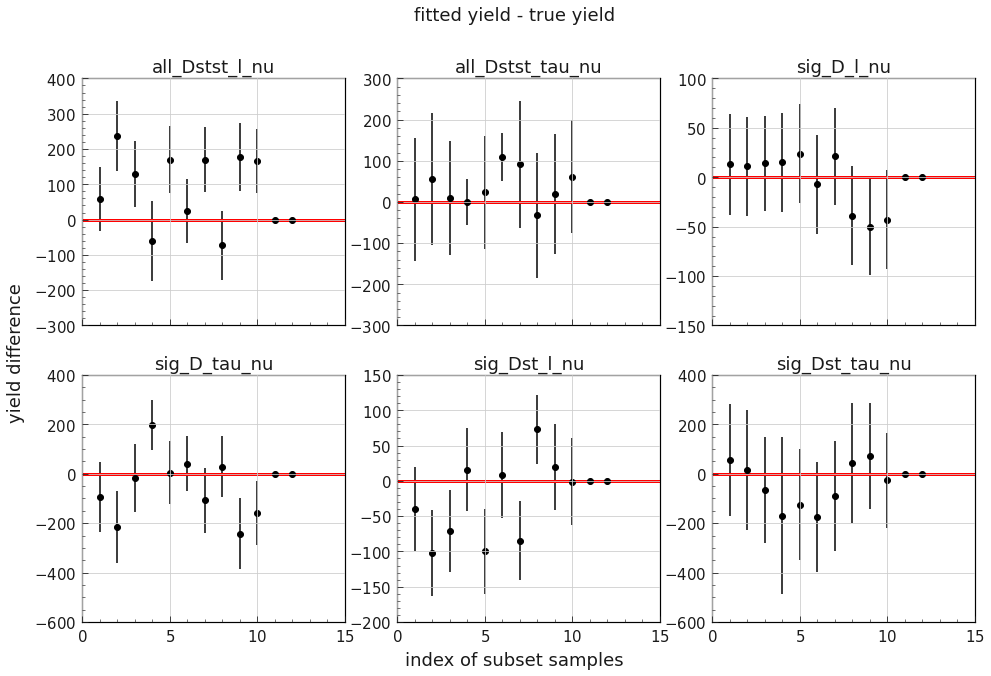

In [11]:
plot_fitting_difference('results_3.yaml')

## Interactive version

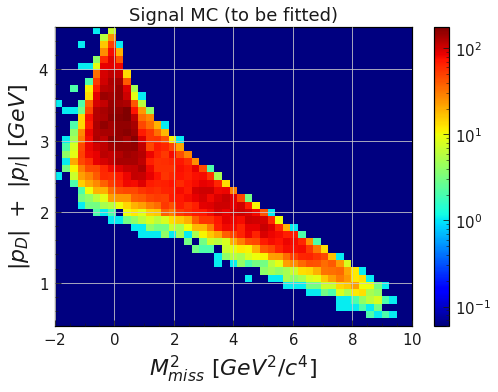

In [22]:
import pyhf
pyhf.set_backend('numpy','minuit')

cut='B0_roeMbc_my_mask>4.26'
xedges = np.linspace(-2, 10, 48)
yedges = np.linspace(0.4, 4.6, 42)
variable_x = 'B0_CMS3_weMissM2'
variable_y = 'p_D_l'

df_merged = pandas.read_parquet('sample_merged.parquet',engine="pyarrow")
(counts, xedges, yedges) = np.histogram2d(df_merged.query(cut)[variable_x], 
                                          df_merged.query(cut)[variable_y],
                                          bins=[xedges, yedges])
counts = counts.T + 0.06
fig,axs=plt.subplots(ncols=1)
X, Y = np.meshgrid(xedges, yedges)
im=axs.pcolormesh(X, Y, counts, cmap='jet', norm=colors.LogNorm())
axs.set_title('Signal MC (to be fitted)')
axs.set_xlabel('$M_{miss}^2\ [GeV^2/c^4]$')
axs.set_ylabel('$|p_D|\ +\ |p_l|\ [GeV]$')
axs.set_xlim(xedges.min(),xedges.max())
axs.set_ylim(yedges.min(),yedges.max())
#axs.set_aspect('equal')
axs.grid()
fig.colorbar(im)

In [23]:
import json

workspace_file = '/home/belle/zhangboy/R_D/Signal_MC14ri/2d_2channels_workspace_3.json'
with open(workspace_file, 'r+') as work_f:
    spec = json.load(work_f)
#    spec['observations'][0]['name'] = 'electron mode'
#    spec['observations'][0]['data'] = counts.ravel().tolist()
    spec_1 = {'channels': spec['channels']}
    model_1 = pyhf.Model(spec_1, poi_name=None)
    NumOfComp = len(spec['channels'][0]['samples'])
#model_1.spec
#workspace = pyhf.Workspace(spec)
#workspace

In [24]:
import ipywidgets as widgets

sliders_norm = {
    f"n{i}" : widgets.FloatSlider(
        1.0,
        min=0.001,
        max=10.0,
        orientation="vertical",
        continuous_update=False,
        description=f"n{i}",
        layout=widgets.Layout(width='45px')
    )
    for i in range(0, NumOfComp)
}

def plot(**kwargs):
    parameters = model_1.config.suggested_init()
    
    for k in kwargs:
        i = int(k.replace("n", ""))
        parameters[i] = kwargs[k]
        
    fig, axs = plt.subplots(ncols=2,figsize=(14,4))
    X, Y = np.meshgrid(xedges, yedges)
    im0=axs[0].pcolormesh(X, Y,
                          model_1.expected_data(parameters).reshape(counts.shape),
                          cmap='jet', norm=colors.LogNorm())
    im1=axs[1].pcolormesh(X, Y, counts, cmap='jet', norm=colors.LogNorm())

    #axs[0].set_aspect('equal')
    #axs[1].set_aspect('equal')
    axs[0].set_title('template')
    axs[1].set_title('data')
    axs[0].grid()
    axs[1].grid()
    axs[0].set_xlim(xedges.min(),xedges.max())
    axs[0].set_ylim(yedges.min(),yedges.max())
    axs[1].set_xlim(xedges.min(),xedges.max())
    axs[1].set_ylim(yedges.min(),yedges.max())
    fig.colorbar(im0, ax=axs[0])
    fig.colorbar(im1, ax=axs[1])

    print(
        "Negative Log-Likelihood: "
        f"{- model_1.logpdf(parameters, np.concatenate([counts.flat]))[0]:.3f}"
    )
    
interactive_plot = widgets.interactive_output(plot, dict(sliders_norm))
interactive_plot.layout.height = "300px"

def fit(b):
    global parameters, correlations
    parameters, correlations= pyhf.infer.mle.fit(np.concatenate([counts.flat]), model_1, return_uncertainties=True, return_correlations=True)
    sum_event=0
    for k in sliders_norm:
        i = int(k.replace("n", ""))
        sliders_norm[k].value = parameters[i,0]
        template_counts = np.sum(model_1.spec['channels'][0]['samples'][i]['data'])
        component_name = model_1.spec['channels'][0]['samples'][i]['name']
        print(f'\n{component_name} counts:             {parameters[i,0] * template_counts}')
        print(f'{component_name} counts uncertainty: {parameters[i,1] * template_counts}')
        sum_event+= parameters[i,0] * template_counts
    print(f'\nTotal fitted counts: {sum_event}')
    print(f'Total fitted counts uncertainty: ')
    print(f'Total generated counts: {len(df_merged)}')
    print(f'\nFitting parameters: {parameters}')
    print(f'Fitting parameter correlations: {correlations}')
#    print(f'uncertainty: {parameters[0][1]}')
        
button = widgets.Button(description="Fit")
button.on_click(fit)

display(
    button,
    interactive_plot,
    widgets.HBox(
        [widgets.HBox(layout=widgets.Layout(width='45px'))]
        + [sliders_norm[f"n{i}"] for i in range(0, NumOfComp)]
    ),
)

Button(description='Fit', style=ButtonStyle())

Output(layout=Layout(height='300px'))


sig_D_tau_nu counts:             8071.232108160512
sig_D_tau_nu counts uncertainty: 430.1566424097541

sig_Dst_tau_nu counts:             1222.6245878878449
sig_Dst_tau_nu counts uncertainty: 614.4093434278818

sig_D_l_nu counts:             11834.504347736116
sig_D_l_nu counts uncertainty: 159.57414344219393

sig_Dst_l_nu counts:             1567.3466841212708
sig_Dst_l_nu counts uncertainty: 189.71470402157058

all_Dstst_tau_nu counts:             1093.662869534811
all_Dstst_tau_nu counts uncertainty: 402.63741226868683

all_Dstst_l_nu counts:             2217.0399512913764
all_Dstst_l_nu counts uncertainty: 310.5006633093072

Total fitted counts: 26006.410548731932
Total fitted counts uncertainty: 
Total generated counts: 25902

Fitting parameters: [[0.10163837 0.00541682]
 [0.02470384 0.0124145 ]
 [0.11906986 0.00160551]
 [0.02068578 0.00250385]
 [0.0207738  0.00764798]
 [0.06522764 0.00913526]]
Fitting parameter correlations: [[ 1.         -0.51425421 -0.09886659  0.25919678  0.

# Plot the fitting results

## Define the slices of projection

In [4]:
from matplotlib import gridspec
import mplhep as hep

print(counts.shape)
p_D_l_slice = 2.5
mm2_slice = 2.4
p_D_l_slice_index, = np.asarray(np.isclose(yedges,p_D_l_slice,atol=0.1)).nonzero()
mm2_slice_index, = np.asarray(np.isclose(xedges,mm2_slice,atol=0.1)).nonzero()
print([mm2_slice_index[0], p_D_l_slice_index[0]])

(41, 47)
[17, 20]


## Plot with mplhep or plt.bar()

In [5]:
# plotting version: residual = data - all_temp
def plot_projection_residual(direction='MM2', slices=False, plot_with='mplhep'):
    fitted_templates = [np.array(model_1.spec['channels'][0]['samples'][i]['data']).reshape(counts.shape) * parameters[i,0] for i in range(NumOfComp)]
    fitted_templates_err = [np.array(model_1.spec['channels'][0]['samples'][i]['data']).reshape(counts.shape) * parameters[i,1] for i in range(NumOfComp)]
    fitted_components_names = [model_1.spec['channels'][0]['samples'][i]['name'] for i in range(NumOfComp)]
    
    def extend(x):
        return np.append(x, x[-1])
    
    def errorband(bins, template_sum, template_err, ax):
        fitted_sum = np.sum(template_sum, axis=0)
        fitted_err = np.sqrt(np.sum(np.array(template_err)**2, axis=0)) # assuming the correlations between each template are 0
        ax.fill_between(bins, extend(fitted_sum - fitted_err), extend(fitted_sum + fitted_err),
        step="post", color="black", alpha=0.3, linewidth=0, zorder=100,)
        
    def plot_with_hep(bins, templates_project, templates_project_err, data, ax1, ax2):
        data_project = data.sum(axis=axis_to_be_summed_over)
        # plot the templates and data
        hep.histplot(templates_project, bin_edges, stack=True, histtype='fill', sort='yield_r', label=fitted_components_names, ax=ax1)
        # errorband(bin_edges, templates_project, templates_project_err, ax1)
        hep.histplot(data_project, bin_edges, histtype='errorbar', color='black', w2=data_project, ax=ax1)
        # plot the residual
        residual = data_project - np.sum(templates_project, axis=0)
        # Error assuming the correlations between data and templates, between each template, are 0
        residual_err = np.sqrt(data_project + np.sum(np.array(templates_project_err)**2, axis=0))
        hep.histplot(residual, bin_edges, histtype='errorbar', color='black', yerr=residual_err, ax=ax2)
        ax2.axhline(y=0, linestyle='-', linewidth=1, color='r')
        
        ax1.grid()
        ax1.set_ylabel('# of counts per bin',fontsize=16)
        ax1.set_xlim(bin_edges.min(), bin_edges.max())
        ax1.set_ylim(0, data_project.max()*1.2)
        ax2.set_ylabel('Residual',fontsize=16)
        ax2.set_xlim(bin_edges.min(), bin_edges.max())
        ax1.legend(bbox_to_anchor=(1,1),ncol=1, fancybox=True, shadow=True,labelspacing=1)
        
    def plot_with_bar(bins, templates_project, templates_project_err, data, ax1, ax2):        
        # calculate the arguments for plotting
        bin_width = bins[1]-bins[0]
        bin_centers = (bins[:-1] + bins[1:]) /2
        data_project = data.sum(axis=axis_to_be_summed_over)
        data_err = np.sqrt(data_project)
        
        # plot the templates
        # sort the components to plot in order of fitted templates_project size
        sorted_indices = sorted(range(NumOfComp), key=lambda i: np.sum(templates_project[i]), reverse = True)
        bottom_hist = np.zeros(data.shape[1-axis_to_be_summed_over])
        for i in sorted_indices:
            binned_counts = templates_project[i]
            ax1.bar(x=bins[:-1], height=binned_counts, bottom=bottom_hist,
                    width=bin_width, align='edge', label=f"{fitted_components_names[i]}")
            bottom_hist = bottom_hist + binned_counts
        # errorband(bin_edges, templates_project, templates_project_err, ax1)
        
        # plot the data
        ax1.errorbar(x=bin_centers, y=data_project, yerr=data_err, fmt='ko')
        # plot the residual
        residual = data_project - np.sum(templates_project, axis=0)
        # Error assuming the correlations between data and templates, between each template, are 0
        residual_err = np.sqrt(data_project + np.sum(np.array(templates_project_err)**2, axis=0))
        ax2.errorbar(x=bin_centers, y=residual, yerr=residual_err, fmt='ko')
        ax2.axhline(y=0, linestyle='-', linewidth=1, color='r')
        
        ax1.grid()
        ax1.set_ylabel('# of counts per bin',fontsize=16)
        ax1.set_xlim(bin_edges.min(), bin_edges.max())
        ax1.set_ylim(0, data_project.max()*1.2)
        ax2.set_ylabel('Residual',fontsize=16)
        ax2.set_xlim(bin_edges.min(), bin_edges.max())
        ax1.legend(bbox_to_anchor=(1,1),ncol=1, fancybox=True, shadow=True,labelspacing=1)        
    
    if direction=='MM2':
        direction_label = '$M_{miss}^2$'
        direction_unit = '$[GeV^2/c^4]$'
        other_direction_label = '$|p_D|\ +\ |p_l|$'
        other_direction_unit = '[GeV]'
        slice_position = p_D_l_slice
        axis_to_be_summed_over = 0
        bin_edges = xedges
        first_slice_index = (p_D_l_slice_index[0]-1)
        second_slice_index = (p_D_l_slice_index[0])
        
        # parameters for slices==True
        fitted_project_slice1 = [temp[:first_slice_index,:].sum(axis=axis_to_be_summed_over) for temp in fitted_templates]
        fitted_project_slice2 = [temp[second_slice_index:,:].sum(axis=axis_to_be_summed_over) for temp in fitted_templates]
        fitted_project_slice1_err = [temp[:first_slice_index,:].sum(axis=axis_to_be_summed_over) for temp in fitted_templates_err]
        fitted_project_slice2_err = [temp[second_slice_index:,:].sum(axis=axis_to_be_summed_over) for temp in fitted_templates_err]
        data_slice1 = counts[:first_slice_index,:]
        data_slice2 = counts[second_slice_index:,:]

        
    elif direction=='p_D_l':
        direction_label = '$|p_D|\ +\ |p_l|$'
        direction_unit = '[GeV]'
        other_direction_label = '$M_{miss}^2$'
        other_direction_unit = '$[GeV^2/c^4]$'
        slice_position = mm2_slice
        axis_to_be_summed_over = 1
        bin_edges = yedges
        first_slice_index = (mm2_slice_index[0]-1)
        second_slice_index = (mm2_slice_index[0])
        
        # parameters for slices==True
        fitted_project_slice1 = [temp[:,:first_slice_index].sum(axis=axis_to_be_summed_over) for temp in fitted_templates]
        fitted_project_slice2 = [temp[:,second_slice_index:].sum(axis=axis_to_be_summed_over) for temp in fitted_templates]
        fitted_project_slice1_err = [temp[:,:first_slice_index].sum(axis=axis_to_be_summed_over) for temp in fitted_templates_err]
        fitted_project_slice2_err = [temp[:,second_slice_index:].sum(axis=axis_to_be_summed_over) for temp in fitted_templates_err]
        data_slice1 = counts[:,:first_slice_index]
        data_slice2 = counts[:,second_slice_index:]
        
        
    else:
        raise ValueError('Current version only supports projection to either MM2 or p_D_l')
    
    if not slices:
        fig = plt.figure(figsize=(6.4,6.4))
        gs = gridspec.GridSpec(2,1, height_ratios=[0.8,0.2])
        ax1 = fig.add_subplot(gs[0])
        ax2 = fig.add_subplot(gs[1])
        #gs.update(hspace=0) 
        fitted_project = [temp.sum(axis=axis_to_be_summed_over) for temp in fitted_templates]
        fitted_project_err = [temp.sum(axis=axis_to_be_summed_over) for temp in fitted_templates_err]
        
        # plot the templates and data and templates_err
        if plot_with=='mplhep':
            plot_with_hep(bin_edges, fitted_project, fitted_project_err, counts, ax1, ax2)
        elif plot_with=='pltbar':
            plot_with_bar(bin_edges, fitted_project, fitted_project_err, counts, ax1, ax2)
        ax1.set_title(f'Fitting projection to {direction_label}')
        ax2.set_xlabel(direction_label)
    
    elif slices:
        fig = plt.figure(figsize=(16,7))
        spec = gridspec.GridSpec(5,2, figure=fig, wspace=1, hspace=0.5)
        ax1 = fig.add_subplot(spec[:-1, 0])
        ax2 = fig.add_subplot(spec[:-1, 1])
        ax3 = fig.add_subplot(spec[-1, 0])
        ax4 = fig.add_subplot(spec[-1, 1])
        #gs.update(hspace=0) 
        
        # plot the templates and data and template_err
        if plot_with=='mplhep':
            plot_with_hep(bin_edges, fitted_project_slice1, fitted_project_slice1_err, data_slice1, ax1, ax3)
            plot_with_hep(bin_edges, fitted_project_slice2, fitted_project_slice2_err, data_slice2, ax2, ax4)
        elif plot_with=='pltbar':
            plot_with_bar(bin_edges, fitted_project_slice1, fitted_project_slice1_err, data_slice1, ax1, ax3)
            plot_with_bar(bin_edges, fitted_project_slice2, fitted_project_slice2_err, data_slice2, ax2, ax4)
            
        ax1.set_title(f'{other_direction_label} < {slice_position}  {other_direction_unit}')
        ax2.set_title(f'{other_direction_label} > {slice_position}  {other_direction_unit}')
        fig.suptitle(f'Fitted projection to {direction_label} in slices of {other_direction_label}')
        fig.supxlabel(direction_label + '  ' + direction_unit)

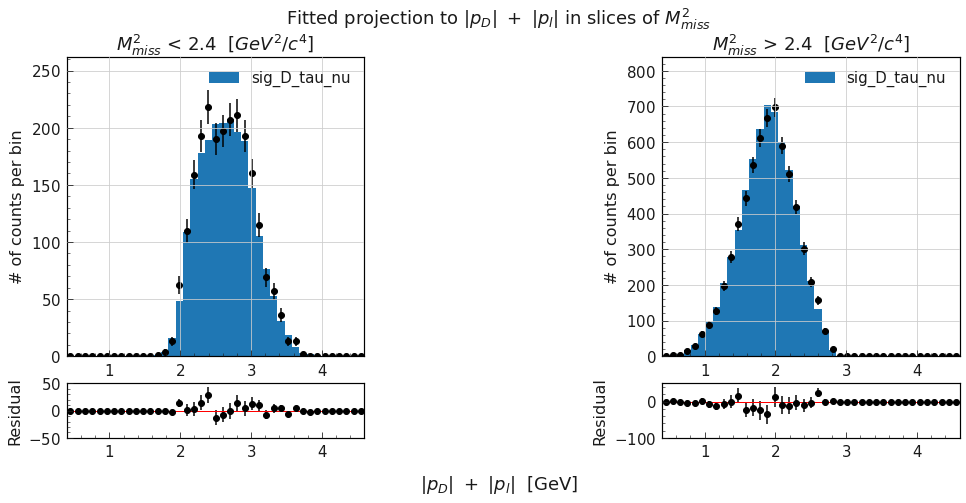

In [6]:
plot_projection_residual(direction='p_D_l',slices=True, plot_with='pltbar')

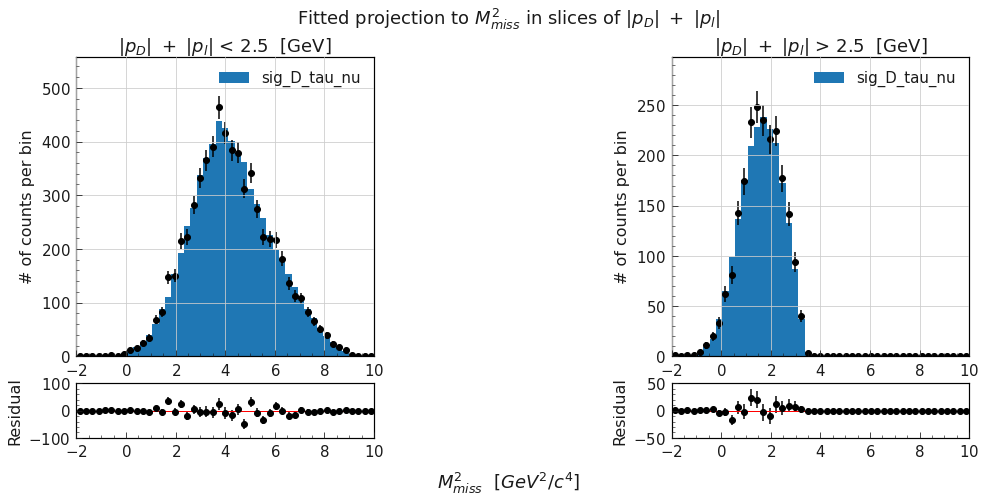

In [7]:
plot_projection_residual(direction='MM2',slices=True, plot_with='pltbar')

In [ ]:
# plotting version: two residual plots, residual_signal = data - all_temp + signal1
def plot_projection_residual(direction='MM2', slices=False, plot_with='mplhep'):
    fitted_templates = [np.array(model_1.spec['channels'][0]['samples'][i]['data']).reshape(counts.shape) * parameters[i,0] for i in range(NumOfComp)]
    fitted_templates_err = [np.array(model_1.spec['channels'][0]['samples'][i]['data']).reshape(counts.shape) * parameters[i,1] for i in range(NumOfComp)]
    fitted_components_names = [model_1.spec['channels'][0]['samples'][i]['name'] for i in range(NumOfComp)]
    
    def extend(x):
        return np.append(x, x[-1])
    
    def errorband(bins, template_sum, template_err, ax):
        fitted_sum = np.sum(template_sum, axis=0)
        fitted_err = np.sqrt(np.sum(np.array(template_err)**2, axis=0)) # assuming the correlations between each template are 0
        ax.fill_between(bins, extend(fitted_sum - fitted_err), extend(fitted_sum + fitted_err),
        step="post", color="black", alpha=0.3, linewidth=0, zorder=100,)
        
    def plot_with_hep(bins, templates_project, templates_project_err, data, signal_name, ax1, ax2, ax3):
        data_project = data.sum(axis=axis_to_be_summed_over)
        # plot the templates and data
        hep.histplot(templates_project, bin_edges, stack=True, histtype='fill', sort='yield_r', label=fitted_components_names, ax=ax1)
        # errorband(bin_edges, templates_project, templates_project_err, ax1)
        hep.histplot(data_project, bin_edges, histtype='errorbar', color='black', w2=data_project, ax=ax1)
        # plot the residual
        signal_index = fitted_components_names.index(signal_name)
        residual = data_project - np.sum(templates_project, axis=0)
        residual_signal = residual + templates_project[signal_index]
        # Error assuming the correlations between data and templates, between each template, are 0
        residual_err = np.sqrt(data_project + np.sum(np.array(templates_project_err)**2, axis=0))
        residual_err_signal = np.sqrt(residual_err**2 - np.array(templates_project_err[signal_index]))
        hep.histplot(residual, bin_edges, histtype='errorbar', color='black', yerr=residual_err, ax=ax2)
        ax2.axhline(y=0, linestyle='-', linewidth=1, color='r')
        hep.histplot(residual_signal, bin_edges, histtype='errorbar', color='black', yerr=residual_err_signal, ax=ax3)
        ax3.axhline(y=0, linestyle='-', linewidth=1, color='r')
        
        ax1.grid()
        ax1.set_ylabel('# of counts per bin',fontsize=16)
        ax1.set_xlim(bin_edges.min(), bin_edges.max())
        ax1.set_ylim(0, data_project.max()*1.2)
        ax2.set_ylabel('Residual',fontsize=16)
        ax2.set_xlim(bin_edges.min(), bin_edges.max())
        ax3.set_ylabel('Data-Bkg',fontsize=16)
        ax3.set_xlim(bin_edges.min(), bin_edges.max())
        ax1.legend(bbox_to_anchor=(1,1),ncol=1, fancybox=True, shadow=True,labelspacing=1)
        
    def plot_with_bar(bins, templates_project, templates_project_err, data, signal_name, ax1, ax2, ax3):        
        # calculate the arguments for plotting
        bin_width = bins[1]-bins[0]
        bin_centers = (bins[:-1] + bins[1:]) /2
        data_project = data.sum(axis=axis_to_be_summed_over)
        data_err = np.sqrt(data_project)
        
        # plot the templates
        # sort the components to plot in order of fitted templates_project size
        sorted_indices = sorted(range(NumOfComp), key=lambda i: np.sum(templates_project[i]), reverse = True)
        bottom_hist = np.zeros(data.shape[1-axis_to_be_summed_over])
        for i in sorted_indices:
            binned_counts = templates_project[i]
            ax1.bar(x=bins[:-1], height=binned_counts, bottom=bottom_hist,
                    width=bin_width, align='edge', label=f"{fitted_components_names[i]}")
            bottom_hist = bottom_hist + binned_counts
        # errorband(bin_edges, templates_project, templates_project_err, ax1)
        
        # plot the data
        ax1.errorbar(x=bin_centers, y=data_project, yerr=data_err, fmt='ko')
        # plot the residual
        signal_index = fitted_components_names.index(signal_name)
        residual = data_project - np.sum(templates_project, axis=0)
        residual_signal = residual + templates_project[signal_index]
        # Error assuming the correlations between data and templates, between each template, are 0
        residual_err = np.sqrt(data_project + np.sum(np.array(templates_project_err)**2, axis=0))
        residual_err_signal = np.sqrt(residual_err**2 - np.array(templates_project_err[signal_index]))
        ax2.errorbar(x=bin_centers, y=residual, yerr=residual_err, fmt='ko')
        ax2.axhline(y=0, linestyle='-', linewidth=1, color='r')
        ax3.errorbar(x=bin_centers, y=residual_signal, yerr=residual_err_signal, fmt='ko')
        ax3.axhline(y=0, linestyle='-', linewidth=1, color='r')
                
        ax1.grid()
        ax1.set_ylabel('# of counts per bin',fontsize=16)
        ax1.set_xlim(bin_edges.min(), bin_edges.max())
        ax1.set_ylim(0, data_project.max()*1.2)
        ax2.set_ylabel('Residual',fontsize=16)
        ax2.set_xlim(bin_edges.min(), bin_edges.max())
        ax3.set_ylabel('Data-Bkg',fontsize=16)
        ax3.set_xlim(bin_edges.min(), bin_edges.max())
        ax1.legend(bbox_to_anchor=(1,1),ncol=1, fancybox=True, shadow=True,labelspacing=1)       
    
    if direction=='MM2':
        direction_label = '$M_{miss}^2$'
        direction_unit = '$[GeV^2/c^4]$'
        other_direction_label = '$|p_D|\ +\ |p_l|$'
        other_direction_unit = '[GeV]'
        slice1_signal = 'D_tau_nu'
        slice2_signal = 'D_l_nu'
        slice_position = p_D_l_slice
        axis_to_be_summed_over = 0
        bin_edges = xedges
        first_slice_index = (p_D_l_slice_index[0]-1)
        second_slice_index = (p_D_l_slice_index[0])
        
        # parameters for slices==True
        fitted_project_slice1 = [temp[:first_slice_index,:].sum(axis=axis_to_be_summed_over) for temp in fitted_templates]
        fitted_project_slice2 = [temp[second_slice_index:,:].sum(axis=axis_to_be_summed_over) for temp in fitted_templates]
        fitted_project_slice1_err = [temp[:first_slice_index,:].sum(axis=axis_to_be_summed_over) for temp in fitted_templates_err]
        fitted_project_slice2_err = [temp[second_slice_index:,:].sum(axis=axis_to_be_summed_over) for temp in fitted_templates_err]
        data_slice1 = counts[:first_slice_index,:]
        data_slice2 = counts[second_slice_index:,:]
        
    elif direction=='p_D_l':
        direction_label = '$|p_D|\ +\ |p_l|$'
        direction_unit = '[GeV]'
        other_direction_label = '$M_{miss}^2$'
        other_direction_unit = '$[GeV^2/c^4]$'
        slice1_signal = 'D_l_nu'
        slice2_signal = 'D_tau_nu'
        slice_position = mm2_slice
        axis_to_be_summed_over = 1
        bin_edges = yedges
        first_slice_index = (mm2_slice_index[0]-1)
        second_slice_index = (mm2_slice_index[0])
        
        # parameters for slices==True
        fitted_project_slice1 = [temp[:,:first_slice_index].sum(axis=axis_to_be_summed_over) for temp in fitted_templates]
        fitted_project_slice2 = [temp[:,second_slice_index:].sum(axis=axis_to_be_summed_over) for temp in fitted_templates]
        fitted_project_slice1_err = [temp[:,:first_slice_index].sum(axis=axis_to_be_summed_over) for temp in fitted_templates_err]
        fitted_project_slice2_err = [temp[:,second_slice_index:].sum(axis=axis_to_be_summed_over) for temp in fitted_templates_err]
        data_slice1 = counts[:,:first_slice_index]
        data_slice2 = counts[:,second_slice_index:]

        
    else:
        raise ValueError('Current version only supports projection to either MM2 or p_D_l')
    
    if not slices:
        fig = plt.figure(figsize=(6.4,6.4))
        gs = gridspec.GridSpec(3,1, height_ratios=[0.7,0.15,0.15])
        ax1 = fig.add_subplot(gs[0])
        ax2 = fig.add_subplot(gs[1])
        ax3 = fig.add_subplot(gs[2])
        gs.update(hspace=0.3) 
        fitted_project = [temp.sum(axis=axis_to_be_summed_over) for temp in fitted_templates]
        fitted_project_err = [temp.sum(axis=axis_to_be_summed_over) for temp in fitted_templates_err]
        
        # plot the templates and data and templates_err
        if plot_with=='mplhep':
            plot_with_hep(bin_edges, fitted_project, fitted_project_err, counts, 'D_tau_nu', ax1, ax2,ax3)
        elif plot_with=='pltbar':
            plot_with_bar(bin_edges, fitted_project, fitted_project_err, counts, 'D_tau_nu', ax1, ax2,ax3)
        ax1.set_title(f'Fitting projection to {direction_label}')
        ax3.set_xlabel(direction_label)
    
    elif slices:
        fig = plt.figure(figsize=(16,7))
        spec = gridspec.GridSpec(6,2, figure=fig, wspace=1, hspace=0.5)
        ax1 = fig.add_subplot(spec[:-2, 0])
        ax2 = fig.add_subplot(spec[:-2, 1])
        ax3 = fig.add_subplot(spec[-2, 0])
        ax4 = fig.add_subplot(spec[-2, 1])
        ax5 = fig.add_subplot(spec[-1, 0])
        ax6 = fig.add_subplot(spec[-1, 1])
        #gs.update(hspace=0) 
        
        # plot the templates and data and template_err
        if plot_with=='mplhep':
            plot_with_hep(bin_edges, fitted_project_slice1, fitted_project_slice1_err, data_slice1, slice1_signal, ax1, ax3, ax5)
            plot_with_hep(bin_edges, fitted_project_slice2, fitted_project_slice2_err, data_slice2, slice2_signal, ax2, ax4, ax6)
        elif plot_with=='pltbar':
            plot_with_bar(bin_edges, fitted_project_slice1, fitted_project_slice1_err, data_slice1, slice1_signal, ax1, ax3, ax5)
            plot_with_bar(bin_edges, fitted_project_slice2, fitted_project_slice2_err, data_slice2, slice2_signal, ax2, ax4, ax6)
            
        ax1.set_title(f'{other_direction_label} < {slice_position}  {other_direction_unit}')
        ax2.set_title(f'{other_direction_label} > {slice_position}  {other_direction_unit}')
        fig.suptitle(f'Fitted projection to {direction_label} in slices of {other_direction_label}')
        fig.supxlabel(direction_label + '  ' + direction_unit)

In [ ]:
# plotting version: residual_signals = data - all_temp + signal1 + signal2
def plot_projection_residual(direction='MM2', slices=False, plot_with='mplhep'):
    fitted_templates = [np.array(model_1.spec['channels'][0]['samples'][i]['data']).reshape(counts.shape) * parameters[i,0] for i in range(NumOfComp)]
    fitted_templates_err = [np.array(model_1.spec['channels'][0]['samples'][i]['data']).reshape(counts.shape) * parameters[i,1] for i in range(NumOfComp)]
    fitted_components_names = [model_1.spec['channels'][0]['samples'][i]['name'] for i in range(NumOfComp)]
    
    def extend(x):
        return np.append(x, x[-1])
    
    def errorband(bins, template_sum, template_err, ax):
        fitted_sum = np.sum(template_sum, axis=0)
        fitted_err = np.sqrt(np.sum(np.array(template_err)**2, axis=0)) # assuming the correlations between each template are 0
        ax.fill_between(bins, extend(fitted_sum - fitted_err), extend(fitted_sum + fitted_err),
        step="post", color="black", alpha=0.3, linewidth=0, zorder=100,)
        
    def plot_with_hep(bins, templates_project, templates_project_err, data, signal_names, ax1, ax2):
        data_project = data.sum(axis=axis_to_be_summed_over)
        # plot the templates and data
        hep.histplot(templates_project, bin_edges, stack=True, histtype='fill', sort='yield_r', label=fitted_components_names, ax=ax1)
        # errorband(bin_edges, templates_project, templates_project_err, ax1)
        hep.histplot(data_project, bin_edges, histtype='errorbar', color='black', w2=data_project, ax=ax1)
        # plot the residual
        signal_index1 = fitted_components_names.index(signal_names[0])
        signal_index2 = fitted_components_names.index(signal_names[1])
        residual = data_project - np.sum(templates_project, axis=0)
        residual_signals = residual + templates_project[signal_index1] + templates_project[signal_index2]
        # Error assuming the correlations between data and templates, between each template, are 0
        residual_err = np.sqrt(data_project + np.sum(np.array(templates_project_err)**2, axis=0))
        residual_err_signals = np.sqrt(residual_err**2 - np.array(templates_project_err[signal_index1]) - np.array(templates_project_err[signal_index2]))
        hep.histplot(residual_signals, bin_edges, histtype='errorbar', color='black', yerr=residual_err_signals, ax=ax2)
        ax2.axhline(y=0, linestyle='-', linewidth=1, color='r')
        
        ax1.grid()
        ax1.set_ylabel('# of counts per bin',fontsize=16)
        ax1.set_xlim(bin_edges.min(), bin_edges.max())
        ax1.set_ylim(0, data_project.max()*1.2)
        ax2.set_ylabel('Data-Bkg',fontsize=16)
        ax2.set_xlim(bin_edges.min(), bin_edges.max())
        ax1.legend(bbox_to_anchor=(1,1),ncol=1, fancybox=True, shadow=True,labelspacing=1)
        
    def plot_with_bar(bins, templates_project, templates_project_err, data, signal_names, ax1, ax2):        
        # calculate the arguments for plotting
        bin_width = bins[1]-bins[0]
        bin_centers = (bins[:-1] + bins[1:]) /2
        data_project = data.sum(axis=axis_to_be_summed_over)
        data_err = np.sqrt(data_project)
        
        # plot the templates
        # sort the components to plot in order of fitted templates_project size
        sorted_indices = sorted(range(NumOfComp), key=lambda i: np.sum(templates_project[i]), reverse = True)
        bottom_hist = np.zeros(data.shape[1-axis_to_be_summed_over])
        for i in sorted_indices:
            binned_counts = templates_project[i]
            ax1.bar(x=bins[:-1], height=binned_counts, bottom=bottom_hist,
                    width=bin_width, align='edge', label=f"{fitted_components_names[i]}")
            bottom_hist = bottom_hist + binned_counts
        # errorband(bin_edges, templates_project, templates_project_err, ax1)
        
        # plot the data
        ax1.errorbar(x=bin_centers, y=data_project, yerr=data_err, fmt='ko')
        # plot the residual
        signal_index1 = fitted_components_names.index(signal_names[0])
        signal_index2 = fitted_components_names.index(signal_names[1])
        residual = data_project - np.sum(templates_project, axis=0)
        residual_signals = residual + templates_project[signal_index1] + templates_project[signal_index2]
        # Error assuming the correlations between data and templates, between each template, are 0
        residual_err = np.sqrt(data_project + np.sum(np.array(templates_project_err)**2, axis=0))
        residual_err_signals = np.sqrt(residual_err**2 - np.array(templates_project_err[signal_index1]) - np.array(templates_project_err[signal_index2]))
        ax2.errorbar(x=bin_centers, y=residual_signals, yerr=residual_err_signals, fmt='ko')
        ax2.axhline(y=0, linestyle='-', linewidth=1, color='r')
        
        ax1.grid()
        ax1.set_ylabel('# of counts per bin',fontsize=16)
        ax1.set_xlim(bin_edges.min(), bin_edges.max())
        ax1.set_ylim(0, data_project.max()*1.2)
        ax2.set_ylabel('Data-Bkg',fontsize=16)
        ax2.set_xlim(bin_edges.min(), bin_edges.max())
        ax1.legend(bbox_to_anchor=(1,1),ncol=1, fancybox=True, shadow=True,labelspacing=1)
    
    if direction=='MM2':
        direction_label = '$M_{miss}^2$'
        direction_unit = '$[GeV^2/c^4]$'
        other_direction_label = '$|p_D|\ +\ |p_l|$'
        other_direction_unit = '[GeV]'
        slice1_signals = ['D_tau_nu', 'Dst_tau_nu']
        slice2_signals = ['D_l_nu', 'Dst_l_nu']
        slice_position = p_D_l_slice
        axis_to_be_summed_over = 0
        bin_edges = xedges
        first_slice_index = (p_D_l_slice_index[0]-1)
        second_slice_index = (p_D_l_slice_index[0])
        
        # parameters for slices==True
        fitted_project_slice1 = [temp[:first_slice_index,:].sum(axis=axis_to_be_summed_over) for temp in fitted_templates]
        fitted_project_slice2 = [temp[second_slice_index:,:].sum(axis=axis_to_be_summed_over) for temp in fitted_templates]
        fitted_project_slice1_err = [temp[:first_slice_index,:].sum(axis=axis_to_be_summed_over) for temp in fitted_templates_err]
        fitted_project_slice2_err = [temp[second_slice_index:,:].sum(axis=axis_to_be_summed_over) for temp in fitted_templates_err]
        data_slice1 = counts[:first_slice_index,:]
        data_slice2 = counts[second_slice_index:,:]
        
    elif direction=='p_D_l':
        direction_label = '$|p_D|\ +\ |p_l|$'
        direction_unit = '[GeV]'
        other_direction_label = '$M_{miss}^2$'
        other_direction_unit = '$[GeV^2/c^4]$'
        slice1_signals = ['D_l_nu', 'Dst_l_nu']
        slice2_signals = ['D_tau_nu', 'Dst_tau_nu']
        slice_position = mm2_slice
        axis_to_be_summed_over = 1
        bin_edges = yedges
        first_slice_index = (mm2_slice_index[0]-1)
        second_slice_index = (mm2_slice_index[0])
        
        # parameters for slices==True
        fitted_project_slice1 = [temp[:,:first_slice_index].sum(axis=axis_to_be_summed_over) for temp in fitted_templates]
        fitted_project_slice2 = [temp[:,second_slice_index:].sum(axis=axis_to_be_summed_over) for temp in fitted_templates]
        fitted_project_slice1_err = [temp[:,:first_slice_index].sum(axis=axis_to_be_summed_over) for temp in fitted_templates_err]
        fitted_project_slice2_err = [temp[:,second_slice_index:].sum(axis=axis_to_be_summed_over) for temp in fitted_templates_err]
        data_slice1 = counts[:,:first_slice_index]
        data_slice2 = counts[:,second_slice_index:]
        
        
    else:
        raise ValueError('Current version only supports projection to either MM2 or p_D_l')
    
    if not slices:
        fig = plt.figure(figsize=(6.4,6.4))
        gs = gridspec.GridSpec(3,1, height_ratios=[0.8,0.2])
        ax1 = fig.add_subplot(gs[0])
        ax2 = fig.add_subplot(gs[1])
        #gs.update(hspace=0.3) 
        fitted_project = [temp.sum(axis=axis_to_be_summed_over) for temp in fitted_templates]
        fitted_project_err = [temp.sum(axis=axis_to_be_summed_over) for temp in fitted_templates_err]
        
        # plot the templates and data and templates_err
        if plot_with=='mplhep':
            plot_with_hep(bin_edges, fitted_project, fitted_project_err, counts, 'D_tau_nu', ax1, ax2)
        elif plot_with=='pltbar':
            plot_with_bar(bin_edges, fitted_project, fitted_project_err, counts, 'D_tau_nu', ax1, ax2)
        ax1.set_title(f'Fitting projection to {direction_label}')
        ax2.set_xlabel(direction_label)
    
    elif slices:
        fig = plt.figure(figsize=(16,7))
        spec = gridspec.GridSpec(5,2, figure=fig, wspace=1, hspace=0.5)
        ax1 = fig.add_subplot(spec[:-1, 0])
        ax2 = fig.add_subplot(spec[:-1, 1])
        ax3 = fig.add_subplot(spec[-1, 0])
        ax4 = fig.add_subplot(spec[-1, 1])
        #gs.update(hspace=0) 
        
        # plot the templates and data and template_err
        if plot_with=='mplhep':
            plot_with_hep(bin_edges, fitted_project_slice1, fitted_project_slice1_err, data_slice1, slice1_signals, ax1, ax3)
            plot_with_hep(bin_edges, fitted_project_slice2, fitted_project_slice2_err, data_slice2, slice2_signals, ax2, ax4)
        elif plot_with=='pltbar':
            plot_with_bar(bin_edges, fitted_project_slice1, fitted_project_slice1_err, data_slice1, slice1_signals, ax1, ax3)
            plot_with_bar(bin_edges, fitted_project_slice2, fitted_project_slice2_err, data_slice2, slice2_signals, ax2, ax4)
            
        ax1.set_title(f'{other_direction_label} < {slice_position}  {other_direction_unit}')
        ax2.set_title(f'{other_direction_label} > {slice_position}  {other_direction_unit}')
        fig.suptitle(f'Fitted projection to {direction_label} in slices of {other_direction_label}')
        fig.supxlabel(direction_label + '  ' + direction_unit)

## Correlations

<ipython-input-19-58cfba154b31>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im0=axs.pcolormesh(X, Y,correlations.T)


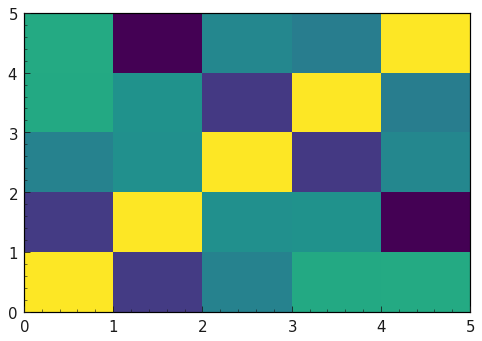

In [19]:
fig, axs = plt.subplots()
a1=np.linspace(0, NumOfComp - 1, NumOfComp)
X, Y = np.meshgrid(a1, a1)
im0=axs.pcolormesh(X, Y,correlations.T)

# 4. Get fitting templates

In [ ]:
# apply BDTs
# plot mm2, mm2 vs p_D_l
# save the templates

In [8]:
import basf2_mva
import pandas

identifier_1 = '/home/belle/zhangboy/R_D/Generic_MC14rd/Continuum_Suppression/MVA1_FastBDT.xml'
test_1 = '../Ntuples/MC_eidglobal_10k_cut.root'
output_file_1 = '../Ntuples/MC_eidglobal_10k_MVA1.root'

identifier_1_5 = '/home/belle/zhangboy/R_D/Generic_MC14rd/B_bkg_Suppression/MVA1_5/MVA1_5_FastBDT.xml'
test_1_5 = '../Ntuples/MC_eidglobal_10k_cut.root'
output_file_1_5 = '../Ntuples/MC_eidglobal_10k_MVA1_5.root'

output_file_1_5_applied = '../Ntuples/MC_eidglobal_10k_MVA1_5_applied.root'

identifier_2_1 = '/home/belle/zhangboy/R_D/Generic_MC14rd/B_bkg_Suppression/MVA2/MVA2_1_FastBDT.xml'
test_2_1 = output_file_1_5_applied
output_file_2_1 = '../Ntuples/MC_eidglobal_10k_MVA2_1.root'
output_file_2_1_applied = '../Ntuples/MC_eidglobal_10k_MVA2_1_applied.root'

In [9]:
# apply CS BDT identifier_1, merge data file and mva output, rename the column
basf2_mva.expert(basf2_mva.vector(identifier_1),  # weightfile
                 basf2_mva.vector(test_1),
                 'B0', output_file_1)

df1 = df_cut.drop_duplicates(subset=['__experiment__','__run__','__event__','__production__','__candidate__']).reset_index(drop=True)
df2 = root_pandas.read_root(output_file_1)
print(len(df1)==len(df2))
df_1 = pandas.concat([df1,df2],axis=1)

df_1=df_1.rename(columns={"__slhome__slbelle__slzhangboy__slR_D__slGeneric_MC14rd__slContinuum_Suppression__slMVA1_FastBDT__ptxml": "MVA1_output"})
df_1=df_1.drop(columns=['__slhome__slbelle__slzhangboy__slR_D__slGeneric_MC14rd__slContinuum_Suppression__slMVA1_FastBDT__ptxml_isSignal'])

# apply BDT 1_5 identifier_1_5, merge, rename, change the output type, save
basf2_mva.expert(basf2_mva.vector(identifier_1_5),  # weightfile
                 basf2_mva.vector(test_1_5),
                 'B0', output_file_1_5)

df3 = root_pandas.read_root(output_file_1_5)
print(len(df_1)==len(df3))
df_1_5 = pandas.concat([df_1,df3],axis=1)

df_1_5=df_1_5.rename(columns={"__slhome__slbelle__slzhangboy__slR_D__slGeneric_MC14rd__slB_bkg_Suppression__slMVA1_5__slMVA1_5_FastBDT__ptxml": "MVA1_5_output"})
df_1_5=df_1_5.drop(columns=['__slhome__slbelle__slzhangboy__slR_D__slGeneric_MC14rd__slB_bkg_Suppression__slMVA1_5__slMVA1_5_FastBDT__ptxml_isSignal'])

df_1_5.MVA1_5_output=np.float64(df_1_5.MVA1_5_output)
print(type(df_1_5.MVA1_5_output[0]))
print(type(df_1_5.isSignal[0]))

df_1_5.to_root(output_file_1_5_applied, key='B0')

# apply BDT 2_1 identifier_2_1, merge, rename, save
basf2_mva.expert(basf2_mva.vector(identifier_2_1),  # weightfile
                 basf2_mva.vector(test_2_1),
                 'B0', output_file_2_1)

df4 = root_pandas.read_root(output_file_2_1)
print(len(df_1_5)==len(df4))
df_2_1 = pandas.concat([df_1_5, df4],axis=1)
print(len(df_1_5)==len(df_2_1))

df_2_1=df_2_1.rename(columns={"__slhome__slbelle__slzhangboy__slR_D__slGeneric_MC14rd__slB_bkg_Suppression__slMVA2__slMVA2_1_FastBDT__ptxml": "MVA2_1_output"})
df_2_1=df_2_1.drop(columns=['__slhome__slbelle__slzhangboy__slR_D__slGeneric_MC14rd__slB_bkg_Suppression__slMVA2__slMVA2_1_FastBDT__ptxml_isSignal'])

df_2_1.to_root(output_file_2_1_applied, key='B0')

[INFO] Elapsed application time in ms 19.8755 for MVA1_FastBDT.xml
[WARNING] String passed to makeROOTCompatible contains double-underscore __, which is used internally for escaping special characters. It is recommended to avoid this. However escaping a string twice with makeROOTCompatible is safe, but will print this warning. Passed string: __slhome__slbelle__slzhangboy__slR_D__slGeneric_MC14rd__slContinuum_Suppression__slMVA1_FastBDT__ptxml_isSignal
False
[INFO] Elapsed application time in ms 17.8737 for MVA1_5_FastBDT.xml
[WARNING] String passed to makeROOTCompatible contains double-underscore __, which is used internally for escaping special characters. It is recommended to avoid this. However escaping a string twice with makeROOTCompatible is safe, but will print this warning. Passed string: __slhome__slbelle__slzhangboy__slR_D__slGeneric_MC14rd__slB_bkg_Suppression__slMVA1_5__slMVA1_5_FastBDT__ptxml_isSignal
True
<class 'numpy.float64'>
<class 'numpy.float64'>


/cvmfs/belle.cern.ch/el7/externals/v01-10-02/Linux_x86_64/common/lib/python3.8/site-packages/root_numpy/_tree.py:575: UserWarning: converter for dtype('O') is not implemented (skipping)
  cobj = _librootnumpy.array2tree_toCObj(arr, name=name, tree=incobj)


[INFO] Elapsed application time in ms 16.9586 for MVA2_1_FastBDT.xml
[WARNING] String passed to makeROOTCompatible contains double-underscore __, which is used internally for escaping special characters. It is recommended to avoid this. However escaping a string twice with makeROOTCompatible is safe, but will print this warning. Passed string: __slhome__slbelle__slzhangboy__slR_D__slGeneric_MC14rd__slB_bkg_Suppression__slMVA2__slMVA2_1_FastBDT__ptxml_isSignal
True
True


In [10]:
df_2_1.columns
len(df_2_1)

1589